In [74]:
# Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Retrosheet Game Log Column Titles
rs_gl_col_names = ["Date","DoubleHeader","DayOfWeek","VisitingTeam","VisitingTeamLeague","VisitingTeamGameNumber","HomeTeam","HomeTeamLeague","HomeTeamGameNumber","VisitorRunsScored","HomeRunsScore","LengthInOuts","DayNight","CompletionInfo","ForfeitInfo","ProtestInfo","ParkID","Attendence","Duration","VisitorLineScore","HomeLineScore","VisitorAB","VisitorH","VisitorD","VisitorT","VisitorHR","VisitorRBI","VisitorSH","VisitorSF","VisitorHBP","VisitorBB","VisitorIBB","VisitorK","VisitorSB","VisitorCS","VisitorGDP","VisitorCI","VisitorLOB","VisitorPitchers","VisitorER","VisitorTER","VisitorWP","VisitorBalks","VisitorPO","VisitorA","VisitorE","VisitorPassed","VisitorDB","VisitorTP","HomeAB","HomeH","HomeD","HomeT","HomeHR","HomeRBI","HomeSH","HomeSF","HomeHBP","HomeBB","HomeIBB","HomeK","HomeSB","HomeCS","HomeGDP","HomeCI","HomeLOB","HomePitchers","HomeER","HomeTER","HomeWP","HomeBalks","HomePO","HomeA","HomeE","HomePassed","HomeDB","HomeTP","UmpireHID","UmpireHName","Umpire1BID","Umpire1BName","Umpire2BID","Umpire2BName","Umpire3BID","Umpire3BName","UmpireLFID","UmpireLFName","UmpireRFID","UmpireRFName","VisitorManagerID","VisitorManagerName","HomeManagerID","HomeManagerName","WinningPitcherID","WinningPitcherName","LosingPitcherID","LosingPitcherNAme","SavingPitcherID","SavingPitcherName","GameWinningRBIID","GameWinningRBIName","VisitorStartingPitcherID","VisitorStartingPitcherName","HomeStartingPitcherID","HomeStartingPitcherName","VisitorBatting1PlayerID","VisitorBatting1Name","VisitorBatting1Position","VisitorBatting2PlayerID","VisitorBatting2Name","VisitorBatting2Position","VisitorBatting3PlayerID","VisitorBatting3Name","VisitorBatting3Position","VisitorBatting4PlayerID","VisitorBatting4Name","VisitorBatting4Position","VisitorBatting5PlayerID","VisitorBatting5Name","VisitorBatting5Position","VisitorBatting6PlayerID","VisitorBatting6Name","VisitorBatting6Position","VisitorBatting7PlayerID","VisitorBatting7Name","VisitorBatting7Position","VisitorBatting8PlayerID","VisitorBatting8Name","VisitorBatting8Position","VisitorBatting9PlayerID","VisitorBatting9Name","VisitorBatting9Position","HomeBatting1PlayerID","HomeBatting1Name","HomeBatting1Position","HomeBatting2PlayerID","HomeBatting2Name","HomeBatting2Position","HomeBatting3PlayerID","HomeBatting3Name","HomeBatting3Position","HomeBatting4PlayerID","HomeBatting4Name","HomeBatting4Position","HomeBatting5PlayerID","HomeBatting5Name","HomeBatting5Position","HomeBatting6PlayerID","HomeBatting6Name","HomeBatting6Position","HomeBatting7PlayerID","HomeBatting7Name","HomeBatting7Position","HomeBatting8PlayerID","HomeBatting8Name","HomeBatting8Position","HomeBatting9PlayerID","HomeBatting9Name","HomeBatting9Position","AdditionalInfo","AcquisitionInfo"]

In [9]:
# Read in Data 
df = pd.read_csv("data/gl2025.txt")
df = pd.DataFrame(df)
df.columns = rs_gl_col_names

df.head()

,Date,DoubleHeader,DayOfWeek,VisitingTeam,VisitingTeamLeague,VisitingTeamGameNumber,HomeTeam,HomeTeamLeague,HomeTeamGameNumber,VisitorRunsScored,...,HomeBatting7Name,HomeBatting7Position,HomeBatting8PlayerID,HomeBatting8Name,HomeBatting8Position,HomeBatting9PlayerID,HomeBatting9Name,HomeBatting9Position,AdditionalInfo,AcquisitionInfo
0,20250319,0,Wed,LAN,NL,2,CHN,NL,2,6,...,Pete Crow-Armstrong,8,kellc002,Carson Kelly,2,bertj001,Jon Berti,4,NaN,Y
1,20250327,0,Thu,CHN,NL,3,ARI,NL,1,10,...,Randal Grichuk,10,mccaj003,Jake McCarthy,8,perdg001,Gerardo Perdomo,6,NaN,Y
2,20250327,0,Thu,SFN,NL,1,CIN,NL,1,6,...,Christian Encarnacion-Strand,3,fralj001,Jake Fraley,9,trevj001,Jose Trevino,2,NaN,Y
3,20250327,0,Thu,DET,AL,1,LAN,NL,3,4,...,Max Muncy,5,rojam002,Miguel Rojas,4,pagea001,Andy Pages,7,NaN,Y
4,20250327,0,Thu,PIT,NL,1,MIA,NL,1,4,...,Derek Hill,8,paulg001,Graham Pauley,5,fortn001,Nick Fortes,2,NaN,Y


In [72]:
# Create a dataframe of every team in the mlb. Get info such as league and division

teams = pd.DataFrame(df["HomeTeam"].unique(), columns= ["Team"])

teams["Division"] = np.select(
    [
        np.isin(teams["Team"], ["TOR", "NYA", "BOS", "BAL", "TBA"]),
        np.isin(teams["Team"], ["NYN", "PHI", "WAS", "MIA", "ATL"]),
        np.isin(teams["Team"], ["CHA", "KCA", "MIN", "CLE", "DET"]),
        np.isin(teams["Team"], ["MIL", "CHN", "SLN", "PIT", "CIN"]),
        np.isin(teams["Team"], ["ATH", "ANA", "SEA", "HOU", "TEX"]),
        np.isin(teams["Team"], ["LAN", "SFN", "COL", "ARI", "SDN"])
    ],

    ["AL East", "NL East", "AL Central", "NL Central", "AL West", "NL West"],
    default="Fail"
)

teams["join"] =1

teams

# Create a list of divisions 

division = teams["Division"].unique()
division


array(['NL Central', 'NL West', 'NL East', 'AL Central', 'AL West',
       'AL East'], dtype=object)

In [71]:

# Create a dataframe for every date in the 2025 regular season 
dates_df = pd.DataFrame(
    pd.date_range(start = "2025-03-18", end = "2025-09-30", freq = "D"),  
    columns = ["Date"])

dates_df["join"] = 1

dates_df 


# Create a home team game df
home_df = df[["Date", "HomeTeam", "HomeRunsScore", "VisitorRunsScored"]]
home_df = home_df.rename(columns = {"HomeTeam": "Team", "HomeRunsScore": "RunsScored", "VisitorRunsScored": "RunsAllowed"})
home_df.loc[home_df["RunsAllowed"] < home_df["RunsScored"], "Win"] = 1
home_df.loc[home_df["RunsAllowed"] > home_df["RunsScored"], "Win"] = 0

# Create a vistor team game df 
visitor_df = df[["Date", "VisitingTeam", "VisitorRunsScored", "HomeRunsScore"]]
visitor_df = visitor_df.rename(columns = {"VisitingTeam": "Team", "HomeRunsScore": "RunsAllowed", "VisitorRunsScored": "RunsScored"})
visitor_df.loc[visitor_df["RunsAllowed"] < visitor_df["RunsScored"], "Win"] = 1
visitor_df.loc[visitor_df["RunsAllowed"] > visitor_df["RunsScored"], "Win"] = 0

visitor_df

# Bind the home and vistor dataframes
games_df = pd.concat([home_df, visitor_df])
games_df = games_df.sort_values(by = ["Team", "Date"]) # Sort by team and then date


# Create a running wins column

#games_df["Wins"] = games_df.groupby("Team")["Win"].cumsum()

# Change type of Date column

games_df["Date"] = pd.to_datetime(games_df["Date"], format = "%Y%m%d")



# Join the teams dataframe and dates dataframe to create a base dataframe

base_df = pd.merge(teams, dates_df, on = "join", how = "inner")

base_df

# join on the games data

games_time_df = pd.merge(base_df, games_df, on = ["Date", "Team"], how = "left")

# Fill NAs
games_time_df = games_time_df.fillna(0)

# Running Wins 
games_time_df = games_time_df.sort_values(by = ["Team", "Date"]) # Sort by team and then date
games_time_df["Wins"] = games_time_df.groupby("Team")["Win"].cumsum()
games_time_df.head(30)





,Team,Division,join,Date,RunsScored,RunsAllowed,Win,Wins
5166,ANA,AL West,1,2025-03-18,0.0,0.0,0.0,0.0
5167,ANA,AL West,1,2025-03-19,0.0,0.0,0.0,0.0
5168,ANA,AL West,1,2025-03-20,0.0,0.0,0.0,0.0
5169,ANA,AL West,1,2025-03-21,0.0,0.0,0.0,0.0
5170,ANA,AL West,1,2025-03-22,0.0,0.0,0.0,0.0
5171,ANA,AL West,1,2025-03-23,0.0,0.0,0.0,0.0
5172,ANA,AL West,1,2025-03-24,0.0,0.0,0.0,0.0
5173,ANA,AL West,1,2025-03-25,0.0,0.0,0.0,0.0
5174,ANA,AL West,1,2025-03-26,0.0,0.0,0.0,0.0
5175,ANA,AL West,1,2025-03-27,1.0,8.0,0.0,0.0


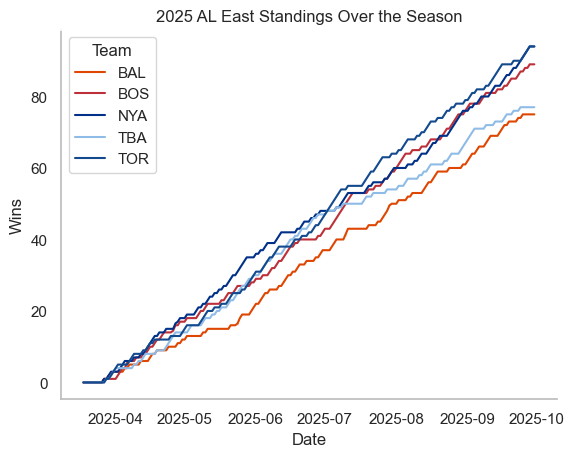

In [83]:

# Data for Graph
graph_df = games_time_df[games_time_df["Division"] == "AL East"]

#sns.set_theme(style = "ticks")

# Create the graph
ax = sns.lineplot(data = graph_df, x = "Date", y = "Wins", hue = "Team", palette= ["#DF4601", "#BD3039", "#003087", "#8FBCE6", "#134A8E"])

# Insert a title 
ax.set_title("2025 AL East Standings Over the Season")

# Set colours of plot axes 
ax.spines["left"].set_color("#BEBEBF")
ax.spines["bottom"].set_color("#BEBEBF")
ax.spines["top"].set_color("white")
ax.spines["right"].set_color("white")

# Make Axis Ticks White
ax.tick_params(axis="x", color = "white")
ax.tick_params(axis="y", color = "white")

plt.show()


